<h1 style="text-align:center;"> IBM Applied Data Science Capstone Project </h1>
<h2 style="text-align:center;"> "Car Accident Severity Prediction" </h2>
<h3 style="text-align:center;"> Submission by:<a href="www.linkedin.com/in/tukait13"> Sankhadeep Bhowmick</a></h3>

This project aims to build a Machine Learning model using historical data on collisions in the city of Seattle, WA to predict the severity of future accidents.

In [1]:
import pandas as pd
import numpy as np

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Data Acquisition

The collisions data is recorded by Seattle Department of Transportation, Traffic Management Division, Traffic Records Group and maintained by ArcGIS and can be found in the Kaggle dataset <a href = "https://www.kaggle.com/jonleon/seattle-sdot-collisions-data"> here </a> 

The dataset has been downloaded and saved to local.

# Data Understanding

In [3]:
# reading the data into a pandas dataframe

df_coll = pd.read_csv("Collisions.csv")
df_coll.head(5)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,...,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,...,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


In [4]:
df_coll.shape

(221266, 40)

In [5]:
df_coll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221266 entries, 0 to 221265
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                213797 non-null  float64
 1   Y                213797 non-null  float64
 2   OBJECTID         221266 non-null  int64  
 3   INCKEY           221266 non-null  int64  
 4   COLDETKEY        221266 non-null  int64  
 5   REPORTNO         221266 non-null  object 
 6   STATUS           221266 non-null  object 
 7   ADDRTYPE         217554 non-null  object 
 8   INTKEY           71823 non-null   float64
 9   LOCATION         216680 non-null  object 
 10  EXCEPTRSNCODE    100863 non-null  object 
 11  EXCEPTRSNDESC    11775 non-null   object 
 12  SEVERITYCODE     221265 non-null  object 
 13  SEVERITYDESC     221266 non-null  object 
 14  COLLISIONTYPE    194767 non-null  object 
 15  PERSONCOUNT      221266 non-null  int64  
 16  PEDCOUNT         221266 non-null  int6

**The locations of the accidents can be visualized on a map using the lattitude `Y` and longitude `X` columns**

In [6]:
import folium
from folium.plugins import MarkerCluster

map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map)
locations = df_coll[['Y', 'X']][df_coll['Y'].notna()].head(1000)
locationlist = locations.values.tolist()
for point in range(len(locations)):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
map

In [7]:
df_coll.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [8]:
df_coll['STATUS'].value_counts().to_frame('Count')

,Count
Matched,194840
Unmatched,26426


In [9]:
df_coll['ADDRTYPE'].value_counts().to_frame('Count')

,Count
Block,144857
Intersection,71823
Alley,874


In [10]:
df_coll['SEVERITYCODE'].value_counts().to_frame('Count')

,Count
1,137485
2,58698
0,21635
2b,3098
3,349


In [11]:
df_coll['COLLISIONTYPE'].value_counts().to_frame('Count')

,Count
Parked Car,48455
Angles,35469
Rear Ended,34624
Other,24528
Sideswipe,18855
Left Turn,14082
Pedestrian,7654
Cycles,5911
Right Turn,3008
Head On,2181


In [12]:
df_coll['PERSONCOUNT'].describe()

count    221266.000000
mean          2.226230
std           1.470364
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          93.000000
Name: PERSONCOUNT, dtype: float64

In [13]:
df_coll['PEDCOUNT'].describe()

count    221266.000000
mean          0.038103
std           0.201745
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: PEDCOUNT, dtype: float64

In [14]:
df_coll['PEDCYLCOUNT'].describe()

count    221266.000000
mean          0.027293
std           0.164345
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: PEDCYLCOUNT, dtype: float64

In [15]:
df_coll['VEHCOUNT'].describe()

count    221266.000000
mean          1.728544
std           0.831224
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          15.000000
Name: VEHCOUNT, dtype: float64

In [16]:
df_coll['INJURIES'].describe()

count    221266.000000
mean          0.373844
std           0.732086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          78.000000
Name: INJURIES, dtype: float64

In [17]:
df_coll['SERIOUSINJURIES'].describe()

count    221266.000000
mean          0.015149
std           0.157908
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          41.000000
Name: SERIOUSINJURIES, dtype: float64

In [18]:
df_coll['FATALITIES'].describe()

count    221266.000000
mean          0.001681
std           0.044562
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: FATALITIES, dtype: float64

In [19]:
df_coll['JUNCTIONTYPE'].value_counts().to_frame('Count')

,Count
Mid-Block (not related to intersection),101579
At Intersection (intersection related),69117
Mid-Block (but intersection related),24402
Driveway Junction,11495
At Intersection (but not related to intersection),2495
Ramp Junction,190
Unknown,21


In [20]:
df_coll['INATTENTIONIND'].value_counts().to_frame('Count')

,Count
Y,30188


In [21]:
df_coll['UNDERINFL'].value_counts().to_frame('Count')

,Count
N,103482
0,81676
Y,5399
1,4230


In [22]:
df_coll['WEATHER'].value_counts().to_frame('Count')

,Count
Clear,114361
Raining,34021
Overcast,28508
Unknown,15131
Snowing,919
Other,853
Fog/Smog/Smoke,577
Sleet/Hail/Freezing Rain,116
Blowing Sand/Dirt,56
Severe Crosswind,26


In [23]:
df_coll['ROADCOND'].value_counts().to_frame('Count')

,Count
Dry,128171
Wet,48715
Unknown,15131
Ice,1231
Snow/Slush,1014
Other,136
Standing Water,119
Sand/Mud/Dirt,77
Oil,64


In [24]:
df_coll['LIGHTCOND'].value_counts().to_frame('Count')

,Count
Daylight,119166
Dark - Street Lights On,50053
Unknown,13523
Dusk,6076
Dawn,2599
Dark - No Street Lights,1573
Dark - Street Lights Off,1236
Other,244
Dark - Unknown Lighting,20


In [25]:
df_coll['SPEEDING'].value_counts().to_frame('Count')

,Count
Y,9913


In [26]:
df_coll['HITPARKEDCAR'].value_counts().to_frame('Count')

,Count
N,209290
Y,11976


# Data cleaning / Data wrangling

**At first, let's check if there are entries in the dataset where no person, pedestrian, cyclists or vehicles are involved and let's handle such situations**

In [27]:
# finding out the irrelevant rows in the dataset
irr_rows_df = df_coll[(df_coll['PERSONCOUNT'] == 0) & \
                         (df_coll['PEDCOUNT'] == 0)& \
                         (df_coll['PEDCYLCOUNT'] == 0) & \
                         (df_coll['VEHCOUNT'] == 0)]

print("Number of such rows in the dataset is:", irr_rows_df.shape[0])

Number of such rows in the dataset is: 19449


It appears that there are 19449 such rows in the dataset!! Let's explore a bit further to determine whether these rows should be kept or deleted from the dataframe. 

In [28]:
# let's check for the number of injuries, serious injuries and fatalities in these situations

print("The number entries with atleast 1 injured person is:", irr_rows_df[irr_rows_df['INJURIES'] > 0].shape[0])

print("The number entries with atleast 1 seriously injured person is:", \
      irr_rows_df[irr_rows_df['SERIOUSINJURIES'] > 0].shape[0])

print("The number entries with atleast 1 fatality is:", irr_rows_df[irr_rows_df['FATALITIES'] > 0].shape[0])

The number entries with atleast 1 injured person is: 1
The number entries with atleast 1 seriously injured person is: 0
The number entries with atleast 1 fatality is: 0


In [29]:
# let's see which severity category these situations fall into

irr_rows_df["SEVERITYCODE"].value_counts().to_frame('count')

,count
0,19446
1,2
2,1


In [30]:
irr_rows_df["STATUS"].value_counts().to_frame('count')

,count
Unmatched,19393
Matched,56


Now based on the above observations we can say that these situations did not cause any injuries (other than the 1 odd one), serious injuries or fatalities and they also tend to be biased towards the '0' category of the severity code. Moreover most of them are unmatched with the acutal incidents. So, lets drop these entries from our dataset.

In [31]:
df_coll.drop(df_coll[(df_coll['PERSONCOUNT'] == 0) & \
                         (df_coll['PEDCOUNT'] == 0)& \
                         (df_coll['PEDCYLCOUNT'] == 0) & \
                         (df_coll['VEHCOUNT'] == 0)].index, inplace = True)

df_coll.shape

(201817, 40)

**Dropping the columns that are irrelevant to our final goal**

In [32]:
df_coll.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [33]:
df_coll_rel = df_coll.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', \
                            'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'COLLISIONTYPE', 'INJURIES', \
                            'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'SDOT_COLCODE','SDOT_COLDESC', \
                            'PEDROWNOTGRNT', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', \
                            'CROSSWALKKEY', 'HITPARKEDCAR'],axis=1)

df_coll_rel.head(5) # The relevant dataframe

,X,Y,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,-122.386772,47.564720,Intersection,2,2,1,0,1,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN
1,-122.341806,47.686934,Intersection,2,4,0,0,2,At Intersection (intersection related),NaN,N,Raining,Wet,Dark - Street Lights On,NaN
2,-122.374899,47.668666,Block,1,4,0,0,3,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN
3,-122.300758,47.683047,Intersection,1,2,0,0,2,At Intersection (intersection related),NaN,0,Raining,Wet,Dark - Street Lights On,NaN
6,-122.323569,47.722577,Block,1,2,0,0,2,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Dark - Street Lights On,NaN


**We would also drop the `X` and `Y` coordinates as we want our model to be independent of the location of the accidents, rather we would keep the `ADDRTYPE` and `JUNCTIONTYPE` columns to include the properties of the locations where the accidents took place**

In [34]:
df_coll_rel.drop(['X', 'Y'],axis=1, inplace = True)
df_coll_rel.head(5)

,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,Intersection,2,2,1,0,1,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN
1,Intersection,2,4,0,0,2,At Intersection (intersection related),NaN,N,Raining,Wet,Dark - Street Lights On,NaN
2,Block,1,4,0,0,3,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN
3,Intersection,1,2,0,0,2,At Intersection (intersection related),NaN,0,Raining,Wet,Dark - Street Lights On,NaN
6,Block,1,2,0,0,2,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Dark - Street Lights On,NaN


**Checking for missing values in the relevant dataframe and dealing with them**

In [35]:
df_coll_rel.isnull().sum()

ADDRTYPE            2011
SEVERITYCODE           1
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE        6576
INATTENTIONIND    171629
UNDERINFL           7030
WEATHER             7240
ROADCOND            7160
LIGHTCOND           7328
SPEEDING          191904
dtype: int64

In [36]:
# removing the entire row where 'SEVERITYCODE' is NULL

df_coll_rel.dropna(subset=['SEVERITYCODE'], inplace = True)

df_coll_rel.isnull().sum()

ADDRTYPE            2011
SEVERITYCODE           0
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE        6576
INATTENTIONIND    171628
UNDERINFL           7030
WEATHER             7240
ROADCOND            7160
LIGHTCOND           7328
SPEEDING          191903
dtype: int64

In [37]:
# Labeling the missing values for the categorical variables 'ADDRTYPE', 
# 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND' and 'LIGHTCOND' to "Other" / "Unspecified"


df_coll_rel['ADDRTYPE'] = df_coll_rel['ADDRTYPE'].fillna(0)
df_coll_rel['ADDRTYPE'] = df_coll_rel['ADDRTYPE'].replace(0,'Other')

df_coll_rel['JUNCTIONTYPE'] = df_coll_rel['JUNCTIONTYPE'].fillna(0)
df_coll_rel['JUNCTIONTYPE'] = df_coll_rel['JUNCTIONTYPE'].replace(0,'Other')

df_coll_rel['WEATHER'] = df_coll_rel['WEATHER'].fillna(0)
df_coll_rel['WEATHER'] = df_coll_rel['WEATHER'].replace(0,'Unspecified')

df_coll_rel['ROADCOND'] = df_coll_rel['ROADCOND'].fillna(0)
df_coll_rel['ROADCOND'] = df_coll_rel['ROADCOND'].replace(0,'Unspecified')

df_coll_rel['LIGHTCOND'] = df_coll_rel['LIGHTCOND'].fillna(0)
df_coll_rel['LIGHTCOND'] = df_coll_rel['LIGHTCOND'].replace(0,'Unspecified')


df_coll_rel.head(5)

,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,Intersection,2,2,1,0,1,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN
1,Intersection,2,4,0,0,2,At Intersection (intersection related),NaN,N,Raining,Wet,Dark - Street Lights On,NaN
2,Block,1,4,0,0,3,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN
3,Intersection,1,2,0,0,2,At Intersection (intersection related),NaN,0,Raining,Wet,Dark - Street Lights On,NaN
6,Block,1,2,0,0,2,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Dark - Street Lights On,NaN


In [38]:
df_coll_rel.isnull().sum()

ADDRTYPE               0
SEVERITYCODE           0
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE           0
INATTENTIONIND    171628
UNDERINFL           7030
WEATHER                0
ROADCOND               0
LIGHTCOND              0
SPEEDING          191903
dtype: int64

In [39]:
df_coll_rel['INATTENTIONIND'].value_counts().to_frame('count')

,count
Y,30188


In [40]:
# replacing the missing values in the 'INATTENTIONIND' column with 0 and 'Y' with 1

df_coll_rel['INATTENTIONIND'] = df_coll_rel['INATTENTIONIND'].fillna(0)
df_coll_rel['INATTENTIONIND'] = df_coll_rel['INATTENTIONIND'].replace('Y',1)

df_coll_rel['INATTENTIONIND'].value_counts().to_frame('count')

,count
0,171628
1,30188


In [41]:
df_coll_rel['UNDERINFL'].value_counts().to_frame('count')

,count
N,103481
0,81676
Y,5399
1,4230


In [42]:
# keeping the labels of the 'UNDERINFL' columns cateorical as of now
# replacing 0 with 'N' and 1 with 'Y' and the NaN values with 'UN' (stands for 'Unknown')

df_coll_rel['UNDERINFL'] = df_coll_rel['UNDERINFL'].replace('1', 'Y')
df_coll_rel['UNDERINFL'] = df_coll_rel['UNDERINFL'].replace('0', 'N')

df_coll_rel['UNDERINFL'] = df_coll_rel['UNDERINFL'].fillna(2)
df_coll_rel['UNDERINFL'] = df_coll_rel['UNDERINFL'].replace(2,'UN')


df_coll_rel['UNDERINFL'].value_counts().to_frame('count')

,count
N,185157
Y,9629
UN,7030


In [43]:
df_coll_rel['SPEEDING'].value_counts().to_frame('count')

,count
Y,9913


In [44]:
# replacing the labels of the 'SPEEDING' column, 'Y' with 1 and NaN values with 0

df_coll_rel['SPEEDING'] = df_coll_rel['SPEEDING'].map({'Y': 1, np.nan : 0})

df_coll_rel['SPEEDING'].value_counts().to_frame('count')

,count
0,191903
1,9913


**Deleting rows with too few values for a variable**

In [45]:
df_coll_rel['WEATHER'].value_counts().to_frame('count')

,count
Clear,114361
Raining,34020
Overcast,28507
Unknown,15131
Unspecified,7240
Snowing,919
Other,853
Fog/Smog/Smoke,577
Sleet/Hail/Freezing Rain,116
Blowing Sand/Dirt,56


In [46]:
# deleting the rows with 'Blowing Snow' label and 'Pratly Cloudy' from the dataframe

df_coll_rel.drop(df_coll_rel[(df_coll_rel['WEATHER'] == 'Blowing Snow') | \
                            (df_coll_rel['WEATHER'] == 'Partly Cloudy')].index, inplace = True)

df_coll_rel['WEATHER'].value_counts().to_frame('count')

,count
Clear,114361
Raining,34020
Overcast,28507
Unknown,15131
Unspecified,7240
Snowing,919
Other,853
Fog/Smog/Smoke,577
Sleet/Hail/Freezing Rain,116
Blowing Sand/Dirt,56


In [47]:
df_coll_rel['LIGHTCOND'].value_counts().to_frame('count')

,count
Daylight,119160
Dark - Street Lights On,50049
Unknown,13523
Unspecified,7328
Dusk,6076
Dawn,2598
Dark - No Street Lights,1572
Dark - Street Lights Off,1236
Other,244
Dark - Unknown Lighting,20


In [48]:
# There a very few rows with 'Dark - Unknown Lighting' label compared to 
# the other label counts. So let's delete the rows having 'Dark - Unknown Lighting' label

df_coll_rel.drop(df_coll_rel[(df_coll_rel['LIGHTCOND'] == 'Dark - Unknown Lighting')].index, inplace = True)

df_coll_rel['LIGHTCOND'].value_counts().to_frame('count')

,count
Daylight,119160
Dark - Street Lights On,50049
Unknown,13523
Unspecified,7328
Dusk,6076
Dawn,2598
Dark - No Street Lights,1572
Dark - Street Lights Off,1236
Other,244


**Now we finally have our cleaned dataset**

In [49]:
df_coll_clean = df_coll_rel
df_coll_clean.head(5)

,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,Intersection,2,2,1,0,1,At Intersection (intersection related),0,N,Clear,Dry,Daylight,0
1,Intersection,2,4,0,0,2,At Intersection (intersection related),0,N,Raining,Wet,Dark - Street Lights On,0
2,Block,1,4,0,0,3,Mid-Block (not related to intersection),0,N,Clear,Dry,Daylight,0
3,Intersection,1,2,0,0,2,At Intersection (intersection related),0,N,Raining,Wet,Dark - Street Lights On,0
6,Block,1,2,0,0,2,Mid-Block (not related to intersection),0,N,Clear,Dry,Dark - Street Lights On,0


In [50]:
df_coll_clean.isnull().sum()

ADDRTYPE          0
SEVERITYCODE      0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
dtype: int64

In [51]:
# checking whether the datatypes of the columns are consistent or not

df_coll_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201786 entries, 0 to 221265
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ADDRTYPE        201786 non-null  object
 1   SEVERITYCODE    201786 non-null  object
 2   PERSONCOUNT     201786 non-null  int64 
 3   PEDCOUNT        201786 non-null  int64 
 4   PEDCYLCOUNT     201786 non-null  int64 
 5   VEHCOUNT        201786 non-null  int64 
 6   JUNCTIONTYPE    201786 non-null  object
 7   INATTENTIONIND  201786 non-null  int64 
 8   UNDERINFL       201786 non-null  object
 9   WEATHER         201786 non-null  object
 10  ROADCOND        201786 non-null  object
 11  LIGHTCOND       201786 non-null  object
 12  SPEEDING        201786 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 21.6+ MB


In [52]:
# the datatype of 'INATTENSIONID' column should be 'int64' as we
# have coverted the labels to either 0's or 1's, but it's 'object'
# so lets convert the datatype to 'int64'

df_coll_clean['INATTENTIONIND'] = df_coll_clean['INATTENTIONIND'].astype('int64')

df_coll_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201786 entries, 0 to 221265
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ADDRTYPE        201786 non-null  object
 1   SEVERITYCODE    201786 non-null  object
 2   PERSONCOUNT     201786 non-null  int64 
 3   PEDCOUNT        201786 non-null  int64 
 4   PEDCYLCOUNT     201786 non-null  int64 
 5   VEHCOUNT        201786 non-null  int64 
 6   JUNCTIONTYPE    201786 non-null  object
 7   INATTENTIONIND  201786 non-null  int64 
 8   UNDERINFL       201786 non-null  object
 9   WEATHER         201786 non-null  object
 10  ROADCOND        201786 non-null  object
 11  LIGHTCOND       201786 non-null  object
 12  SPEEDING        201786 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 21.6+ MB


In [53]:
df_coll_clean.shape

(201786, 13)

# Feature Selection

**Calculating Pearson correlation for the Features in the cleaned dataset in order to best select the Features for modelling**

In [54]:
# I'm going to use "one hot encoding" for the categorical variables while developing the model
# so copying the cleaned dataset into another variable because I am going to use LabelEncoder()
# as of now to convert the labels of categorical variables into numeric values in order to calculate their
# Pearson correlation with the target variable 'SEVERITYCODE'

df_coll_pearson = df_coll_clean.copy()

In [55]:
# encoding the labels of the categorical variables as Pearson's Correlation only works
# on numeric values

from sklearn import preprocessing


severity = preprocessing.LabelEncoder()
severity.fit(df_coll_pearson['SEVERITYCODE'])
df_coll_pearson['SEVERITYCODE'] = severity.transform(df_coll_pearson['SEVERITYCODE'])


addrtype = preprocessing.LabelEncoder()
addrtype.fit(df_coll_pearson['ADDRTYPE'])
df_coll_pearson['ADDRTYPE'] = addrtype.transform(df_coll_pearson['ADDRTYPE'])

junctype = preprocessing.LabelEncoder()
junctype.fit(df_coll_pearson['JUNCTIONTYPE'])
df_coll_pearson['JUNCTIONTYPE'] = junctype.transform(df_coll_pearson['JUNCTIONTYPE'])

underinfl = preprocessing.LabelEncoder()
underinfl.fit(df_coll_pearson['UNDERINFL'])
df_coll_pearson['UNDERINFL'] = underinfl.transform(df_coll_pearson['UNDERINFL'])


weather = preprocessing.LabelEncoder()
weather.fit(df_coll_pearson['WEATHER'])
df_coll_pearson['WEATHER'] = weather.transform(df_coll_pearson['WEATHER'])

roadcond = preprocessing.LabelEncoder()
roadcond.fit(df_coll_pearson['ROADCOND'])
df_coll_pearson['ROADCOND'] = roadcond.transform(df_coll_pearson['ROADCOND'])

lightcond = preprocessing.LabelEncoder()
lightcond.fit(df_coll_pearson['LIGHTCOND'])
df_coll_pearson['LIGHTCOND'] = lightcond.transform(df_coll_pearson['LIGHTCOND'])


df_coll_pearson.head(5)


,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,2,2,1,0,1,1,0,0,1,0,4,0
1,2,2,4,0,0,2,1,0,0,5,9,2,0
2,1,1,4,0,0,3,4,0,0,1,0,4,0
3,2,1,2,0,0,2,1,0,0,5,9,2,0
6,1,1,2,0,0,2,4,0,0,1,0,2,0


In [56]:
# Pearson correlation

df_coll_pearson.corr()

,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
ADDRTYPE,1.000000,0.173803,0.053029,0.129287,0.076917,-0.054608,-0.805299,-0.076085,-0.050694,-0.051918,-0.009064,-0.035142,-0.058861
SEVERITYCODE,0.173803,1.000000,0.128641,0.281092,0.214854,0.002208,-0.220452,0.043036,-0.000790,-0.176131,-0.080253,-0.158328,0.063186
PERSONCOUNT,0.053029,0.128641,1.000000,-0.018095,-0.037887,0.378822,-0.087081,0.076741,-0.008585,-0.096414,-0.044655,-0.081753,0.001155
PEDCOUNT,0.129287,0.281092,-0.018095,1.000000,-0.018894,-0.252076,-0.132095,-0.006251,0.011215,-0.032379,-0.003183,-0.059443,-0.031209
PEDCYLCOUNT,0.076917,0.214854,-0.037887,-0.018894,1.000000,-0.241278,-0.093751,0.003787,-0.028309,-0.064170,-0.057263,-0.013756,-0.021157
VEHCOUNT,-0.054608,0.002208,0.378822,-0.252076,-0.241278,1.000000,0.034829,0.084990,-0.207664,-0.263241,-0.138814,-0.253710,-0.016586
JUNCTIONTYPE,-0.805299,-0.220452,-0.087081,-0.132095,-0.093751,0.034829,1.000000,0.049467,0.063518,0.153067,0.057577,0.117492,0.053291
INATTENTIONIND,-0.076085,0.043036,0.076741,-0.006251,0.003787,0.084990,0.049467,1.000000,-0.055614,-0.108806,-0.068360,-0.053503,-0.048658
UNDERINFL,-0.050694,-0.000790,-0.008585,0.011215,-0.028309,-0.207664,0.063518,-0.055614,1.000000,0.135482,0.074952,0.028738,0.074816
WEATHER,-0.051918,-0.176131,-0.096414,-0.032379,-0.064170,-0.263241,0.153067,-0.108806,0.135482,1.000000,0.707405,0.467006,0.004657


<AxesSubplot:>

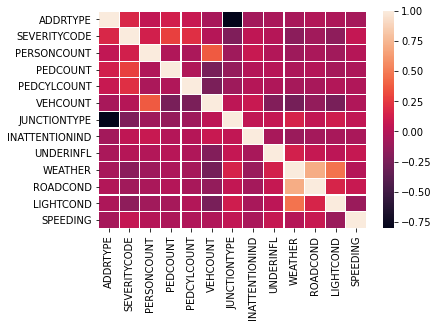

In [57]:
# the correlation heatmap

import seaborn as sns

sns.heatmap(df_coll_pearson.corr(), linewidth=.2, cbar_kws={"shrink": 1})

**Selecting the Features set**

In [58]:
# based on the above observation of the Pearson correlation actually there is nothing to drop as it seems

features = df_coll_clean[['ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', \
                          'VEHCOUNT', 'JUNCTIONTYPE','INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', \
                          'LIGHTCOND', 'SPEEDING']]

print("The number of rows and columns in the features set respectively are:", features.shape)
features.head()

The number of rows and columns in the features set respectively are: (201786, 12)


,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,Intersection,2,1,0,1,At Intersection (intersection related),0,N,Clear,Dry,Daylight,0
1,Intersection,4,0,0,2,At Intersection (intersection related),0,N,Raining,Wet,Dark - Street Lights On,0
2,Block,4,0,0,3,Mid-Block (not related to intersection),0,N,Clear,Dry,Daylight,0
3,Intersection,2,0,0,2,At Intersection (intersection related),0,N,Raining,Wet,Dark - Street Lights On,0
6,Block,2,0,0,2,Mid-Block (not related to intersection),0,N,Clear,Dry,Dark - Street Lights On,0


# Exploratory Data Analysis

In [59]:
import seaborn as sns 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Let's try to get an idea about how much of the persons involved in an acident were pedestrians

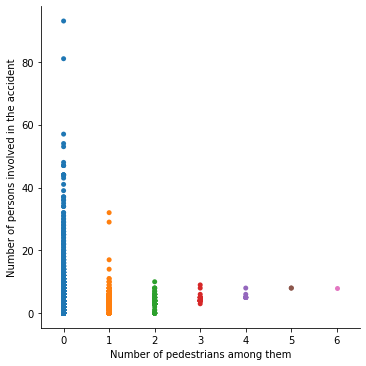

In [60]:
ax = sns.catplot (x = 'PEDCOUNT', y = 'PERSONCOUNT', jitter = False, data = df_coll_clean)
ax.set(xlabel = 'Number of pedestrians among them', ylabel = 'Number of persons involved in the accident' )

Let's try to get an idea about how much of the persons involved in an acident were cyclists

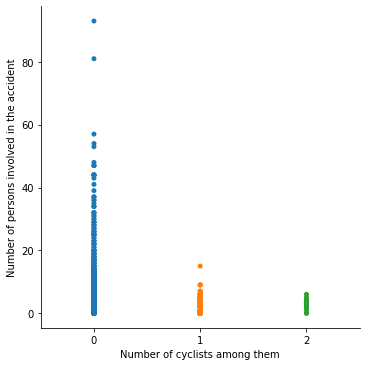

In [61]:
ax1 = sns.catplot (x = 'PEDCYLCOUNT', y = 'PERSONCOUNT', jitter = False, data = df_coll_clean)
ax1.set(xlabel = 'Number of cyclists among them', ylabel = 'Number of persons involved in the accident')

Let's try to get an idea about the number of persons involved in an accident when vehicles are involved

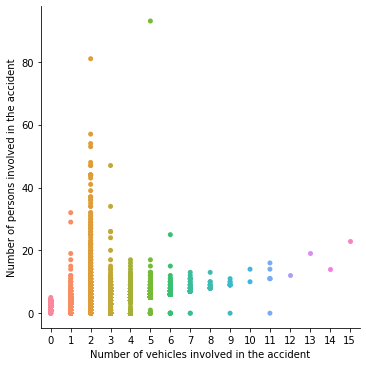

In [62]:
ax2 = sns.catplot (x = 'VEHCOUNT', y = 'PERSONCOUNT', jitter = False, data = df_coll_clean)
ax2.set(xlabel = 'Number of vehicles involved in the accident', ylabel = 'Number of persons involved in the accident' )

Let's try to visualze the different label counts of the target variable SEVERITYCODE

<AxesSubplot:xlabel='SEVERITYCODE', ylabel='count'>

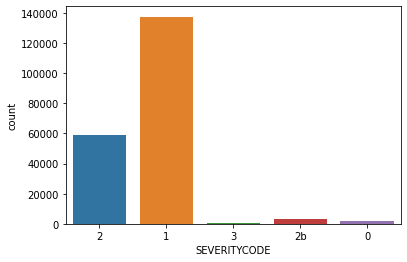

In [63]:
sns.countplot(x = df_coll_clean['SEVERITYCODE'], data=df_coll_clean)

### Now we'll try to explore the relationship between each of the indipendent variables and `SEVERITYCODE`

**Relationship between the Severity of an accident and Address type**

In [64]:
df_coll_clean['ADDRTYPE'].value_counts()

Block           131579
Intersection     67433
Other             2011
Alley              763
Name: ADDRTYPE, dtype: int64

[Text(0.5, 0, 'Severity code'), Text(0, 0.5, 'Count, Intersection')]

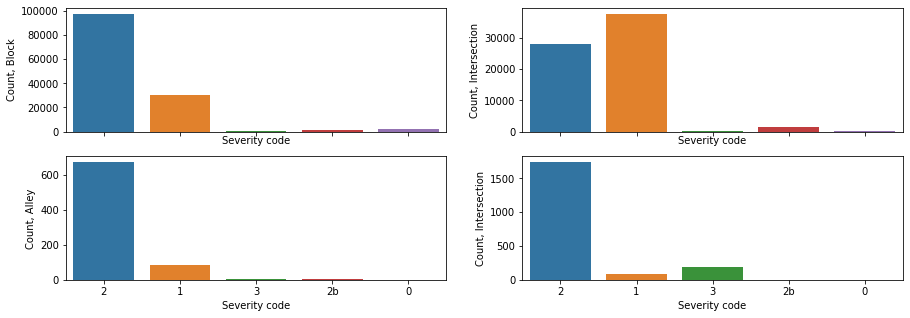

In [65]:
block_df = df_coll_clean[df_coll_clean['ADDRTYPE']== 'Block']
intersection_df = df_coll_clean[df_coll_clean['ADDRTYPE']== 'Intersection']
alley_df = df_coll_clean[df_coll_clean['ADDRTYPE']== 'Alley']
other_df = df_coll_clean[df_coll_clean['ADDRTYPE']== 'Other']

fig, axes = plt.subplots(2, 2, sharex = True, figsize = (15,5))


sns.countplot(ax = axes[1, 0], x = alley_df['SEVERITYCODE'], data = alley_df)
axes[1,0].set(xlabel = 'Severity code', ylabel = 'Count, Alley')

sns.countplot(ax = axes[1, 1], x = other_df['SEVERITYCODE'], data = other_df)
axes[1,1].set(xlabel = 'Severity code', ylabel = 'Count, Intersection')

sns.countplot(ax = axes[0, 0], x = block_df['SEVERITYCODE'], data = block_df)
axes[0,0].set(xlabel = 'Severity code', ylabel = 'Count, Block')

sns.countplot(ax = axes[0, 1], x = intersection_df['SEVERITYCODE'], data = intersection_df)
axes[0,1].set(xlabel = 'Severity code', ylabel = 'Count, Intersection')

**Relationship between the Severity of an accident and the junction type**

**N.B.** it's tempting to keep only one independent feature between 'ADDRTYPE'
and 'JUNCTIONTYPE' for modelling and drop the other, but on a close observation of the labels they
contain, it becomes evident that they both are needed be kept

In [66]:
df_coll_clean['JUNCTIONTYPE'].value_counts().to_frame('count')

,count
Mid-Block (not related to intersection),93815
At Intersection (intersection related),65133
Mid-Block (but intersection related),23088
Driveway Junction,10860
Other,6576
At Intersection (but not related to intersection),2131
Ramp Junction,171
Unknown,12


[Text(0.5, 0, 'Severity code'), Text(0, 0.5, 'Count, other')]

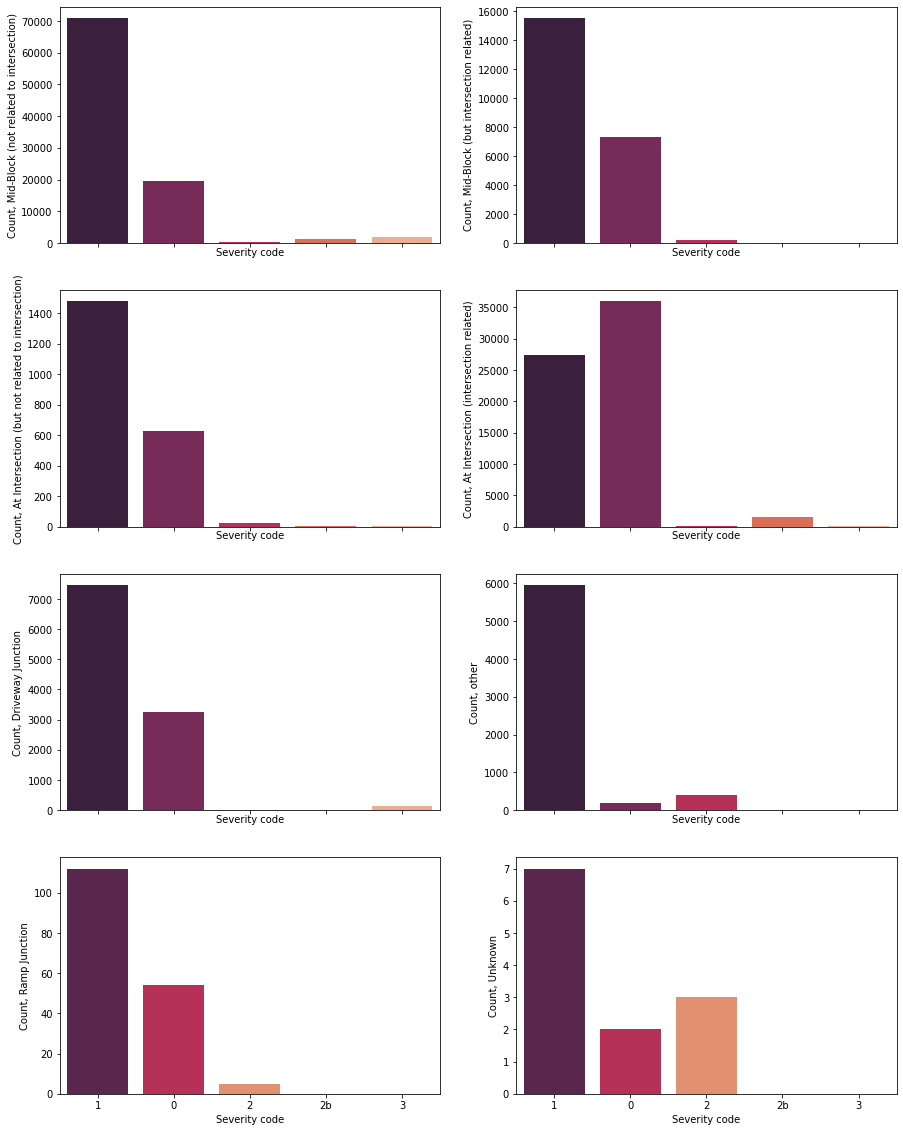

In [67]:
junc1_df = df_coll_clean[df_coll_clean['JUNCTIONTYPE']== 'Mid-Block (not related to intersection)']
junc2_df = df_coll_clean[df_coll_clean['JUNCTIONTYPE']== 'Mid-Block (but intersection related)']
junc3_df = df_coll_clean[df_coll_clean['JUNCTIONTYPE']== 'At Intersection (but not related to intersection)']
junc4_df = df_coll_clean[df_coll_clean['JUNCTIONTYPE']== 'At Intersection (intersection related)']
junc5_df = df_coll_clean[df_coll_clean['JUNCTIONTYPE']== 'Driveway Junction']
junc6_df = df_coll_clean[df_coll_clean['JUNCTIONTYPE']== 'Ramp Junction']
junc7_df = df_coll_clean[df_coll_clean['JUNCTIONTYPE']== 'Other']
junc8_df = df_coll_clean[df_coll_clean['JUNCTIONTYPE']== 'Unknown']


fig, axes = plt.subplots(4, 2, sharex = True, figsize = (15,20))

sns.countplot(ax = axes[3, 0], x = junc6_df['SEVERITYCODE'], palette = 'rocket', data = junc6_df)
axes[3,0].set(xlabel = 'Severity code', ylabel = 'Count, Ramp Junction')

sns.countplot(ax = axes[3, 1], x = junc8_df['SEVERITYCODE'], palette = 'rocket', data = junc8_df)
axes[3,1].set(xlabel = 'Severity code', ylabel = 'Count, Unknown')

sns.countplot(ax = axes[0, 0], x = junc1_df['SEVERITYCODE'], palette = 'rocket', data = junc1_df)
axes[0,0].set(xlabel = 'Severity code', ylabel = 'Count, Mid-Block (not related to intersection)')

sns.countplot(ax = axes[0, 1], x = junc2_df['SEVERITYCODE'], palette = 'rocket', data = junc2_df)
axes[0,1].set(xlabel = 'Severity code', ylabel = 'Count, Mid-Block (but intersection related)')

sns.countplot(ax = axes[1, 0], x = junc3_df['SEVERITYCODE'], palette = 'rocket', data = junc3_df)
axes[1,0].set(xlabel = 'Severity code', ylabel = 'Count, At Intersection (but not related to intersection)')

sns.countplot(ax = axes[1, 1], x = junc4_df['SEVERITYCODE'], palette = 'rocket', data = junc4_df)
axes[1,1].set(xlabel = 'Severity code', ylabel = 'Count, At Intersection (intersection related)')

sns.countplot(ax = axes[2, 0], x = junc5_df['SEVERITYCODE'], palette = 'rocket', data = junc5_df)
axes[2,0].set(xlabel = 'Severity code', ylabel = 'Count, Driveway Junction')

sns.countplot(ax = axes[2, 1], x = junc7_df['SEVERITYCODE'], palette = 'rocket', data = junc7_df)
axes[2,1].set(xlabel = 'Severity code', ylabel = 'Count, other')

**Relationship between the Severity of an accident and Person count**

[Text(0.5, 0, 'Severity code'),
 Text(0, 0.5, 'Number of persons involved in the accident')]

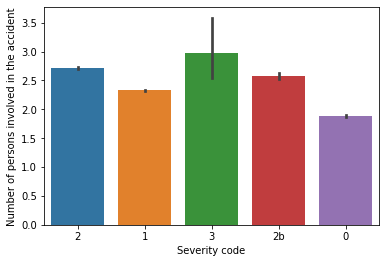

In [68]:
ax3 = sns.barplot(x = 'SEVERITYCODE',y = 'PERSONCOUNT', data = df_coll_clean)
ax3.set(xlabel = "Severity code", ylabel = 'Number of persons involved in the accident')


**Relationship between the Severity of an accident and Pedestrian count**

[Text(0.5, 0, 'Severity code'),
 Text(0, 0.5, 'Number of pedestrians involved in the accident')]

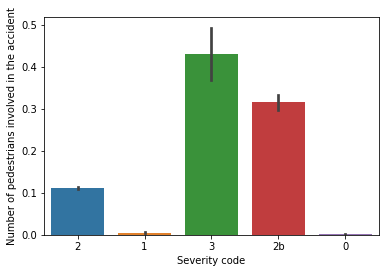

In [69]:
ax3 = sns.barplot(x = 'SEVERITYCODE',y = 'PEDCOUNT', data = df_coll_clean)
ax3.set(xlabel = "Severity code", ylabel = 'Number of pedestrians involved in the accident')

**Relationship between the Severity of an accident and Cyclist count**

[Text(0.5, 0, 'Severity code'),
 Text(0, 0.5, 'Number of cyclists involved in the accident')]

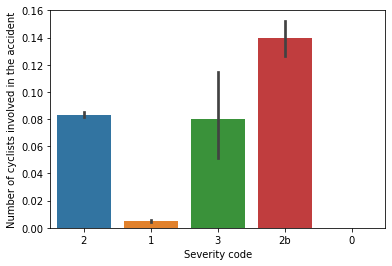

In [70]:
ax3 = sns.barplot(x = 'SEVERITYCODE',y = 'PEDCYLCOUNT', data = df_coll_clean)
ax3.set(xlabel = "Severity code", ylabel = 'Number of cyclists involved in the accident')

**Relationship between the Severity of an accident and Vehicle count**

[Text(0.5, 0, 'Severity code'),
 Text(0, 0.5, 'Number of vehicles involved in the accident')]

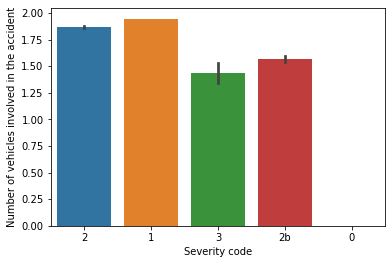

In [71]:
ax3 = sns.barplot(x = 'SEVERITYCODE',y = 'VEHCOUNT', data = df_coll_clean)
ax3.set(xlabel = "Severity code", ylabel = 'Number of vehicles involved in the accident')

**Severity of the accidents where Inattention played a part in the accident**

[Text(0.5, 0, 'Severity code'),
 Text(0, 0.5, 'Count, when inattention played a part')]

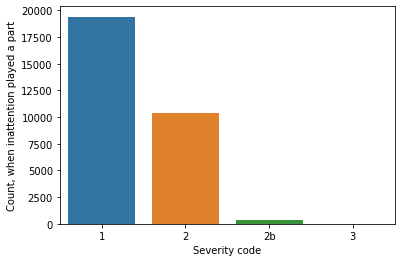

In [72]:
inatt_df = df_coll_clean[df_coll_clean['INATTENTIONIND']== 1]

ax5 = sns.countplot(x = inatt_df['SEVERITYCODE'], data = inatt_df)
ax5.set(xlabel = "Severity code", ylabel = 'Count, when inattention played a part')

**Severity of the accidents where influence of Drug/Alcohol played a part in the accident**

[Text(0.5, 0, 'Severity code'),
 Text(0, 0.5, 'Count, when drug/alcohol influence played a part')]

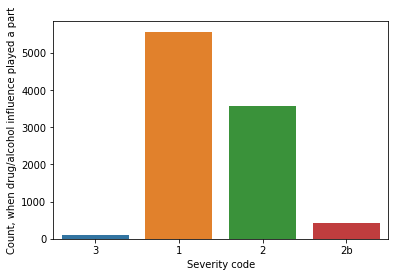

In [73]:
underinfl_df = df_coll_clean[df_coll_clean['UNDERINFL']== 'Y']

ax6 = sns.countplot(x = underinfl_df['SEVERITYCODE'], data = underinfl_df)
ax6.set(xlabel = "Severity code", ylabel = 'Count, when drug/alcohol influence played a part')

**Severity of the accidents where Speeding of the vehicles played a part in the accident**

[Text(0.5, 0, 'Severity code'),
 Text(0, 0.5, 'Count, when speeding played a part')]

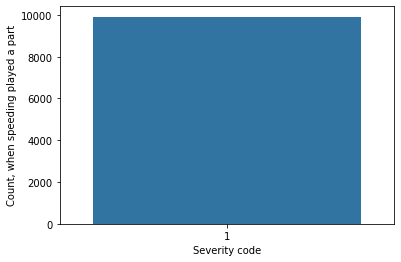

In [74]:
speeding_df = df_coll_clean[df_coll_clean['SPEEDING']== 1]

ax7 = sns.countplot(x = speeding_df['SPEEDING'], data = speeding_df)
ax7.set(xlabel = "Severity code", ylabel = 'Count, when speeding played a part')

**N.B.** We can see from the above plot that speeding only led to the accidents with severity code category '1' only, none of the other severity levels were seen when speeding was a factor in the accidents. And also over 86% of the rows in the original dataset were missing the values for the `SPEEDING` field. Therefore, I'm going to remove the `SPEEDING` variable from the features set to avoid bias in our model towards this severity code category.

In [75]:
df_coll_clean.drop(['SPEEDING'], axis = 1, inplace = True) # let's also drop it from the df_coll_clean
                                                             # as we will be using this dataframe further
features.drop(['SPEEDING'], axis = 1, inplace = True)
features.head(5)

c:\users\sankh\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,Intersection,2,1,0,1,At Intersection (intersection related),0,N,Clear,Dry,Daylight
1,Intersection,4,0,0,2,At Intersection (intersection related),0,N,Raining,Wet,Dark - Street Lights On
2,Block,4,0,0,3,Mid-Block (not related to intersection),0,N,Clear,Dry,Daylight
3,Intersection,2,0,0,2,At Intersection (intersection related),0,N,Raining,Wet,Dark - Street Lights On
6,Block,2,0,0,2,Mid-Block (not related to intersection),0,N,Clear,Dry,Dark - Street Lights On


**Relationship between the Severity of an accident and the Weather condition**

In [76]:
df_coll_clean['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,114355
Raining,34011
Overcast,28506
Unknown,15131
Unspecified,7240
Snowing,919
Other,849
Fog/Smog/Smoke,577
Sleet/Hail/Freezing Rain,116
Blowing Sand/Dirt,56


[Text(0.5, 0, 'Severity code'), Text(0, 0.5, 'Count, Unspecified')]

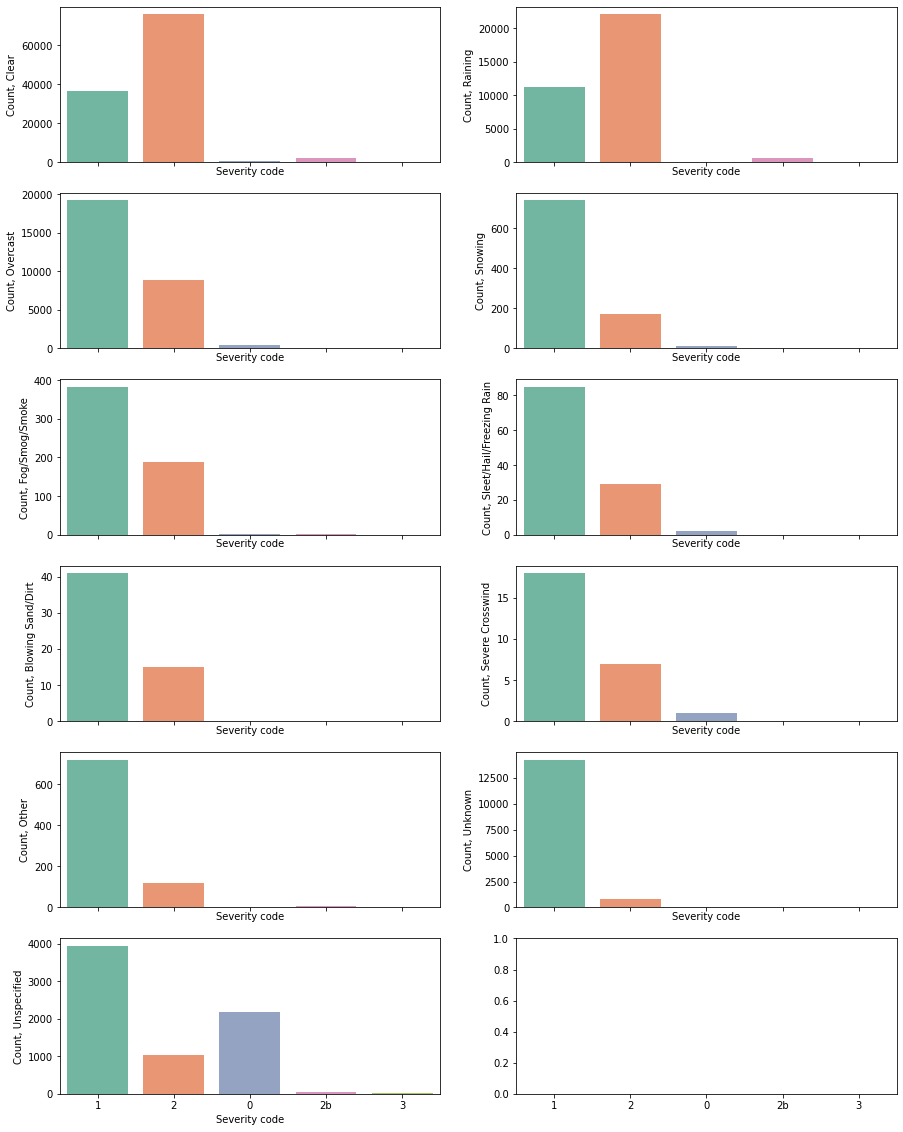

In [77]:
weath1_df = df_coll_clean[df_coll_clean['WEATHER']== 'Clear']
weath2_df = df_coll_clean[df_coll_clean['WEATHER']== 'Raining']
weath3_df = df_coll_clean[df_coll_clean['WEATHER']== 'Overcast']
weath4_df = df_coll_clean[df_coll_clean['WEATHER']== 'Snowing']
weath5_df = df_coll_clean[df_coll_clean['WEATHER']== 'Fog/Smog/Smoke']
weath6_df = df_coll_clean[df_coll_clean['WEATHER']== 'Sleet/Hail/Freezing Rain']
weath7_df = df_coll_clean[df_coll_clean['WEATHER']== 'Blowing Sand/Dirt']
weath8_df = df_coll_clean[df_coll_clean['WEATHER']== 'Severe Crosswind']
weath9_df = df_coll_clean[df_coll_clean['WEATHER']== 'Other']
weath10_df = df_coll_clean[df_coll_clean['WEATHER']== 'Unknown']
weath11_df = df_coll_clean[df_coll_clean['WEATHER']== 'Unspecified']


fig, axes = plt.subplots(6, 2, sharex = True, figsize = (15,20))

sns.countplot(ax = axes[0, 0], x = weath1_df['SEVERITYCODE'], palette = 'Set2', data = weath1_df)
axes[0,0].set(xlabel = 'Severity code', ylabel = 'Count, Clear')

sns.countplot(ax = axes[0, 1], x = weath2_df['SEVERITYCODE'], palette = 'Set2', data = weath2_df)
axes[0,1].set(xlabel = 'Severity code', ylabel = 'Count, Raining')

sns.countplot(ax = axes[1, 0], x = weath3_df['SEVERITYCODE'], palette = 'Set2', data = weath3_df)
axes[1,0].set(xlabel = 'Severity code', ylabel = 'Count, Overcast')

sns.countplot(ax = axes[1, 1], x = weath4_df['SEVERITYCODE'], palette = 'Set2', data = weath4_df)
axes[1,1].set(xlabel = 'Severity code', ylabel = 'Count, Snowing')

sns.countplot(ax = axes[2, 0], x = weath5_df['SEVERITYCODE'], palette = 'Set2', data = weath5_df)
axes[2,0].set(xlabel = 'Severity code', ylabel = 'Count, Fog/Smog/Smoke')

sns.countplot(ax = axes[2, 1], x = weath6_df['SEVERITYCODE'], palette = 'Set2', data = weath6_df)
axes[2,1].set(xlabel = 'Severity code', ylabel = 'Count, Sleet/Hail/Freezing Rain')

sns.countplot(ax = axes[3, 0], x = weath7_df['SEVERITYCODE'], palette = 'Set2', data = weath7_df)
axes[3,0].set(xlabel = 'Severity code', ylabel = 'Count, Blowing Sand/Dirt')

sns.countplot(ax = axes[3, 1], x = weath8_df['SEVERITYCODE'], palette = 'Set2', data = weath8_df)
axes[3,1].set(xlabel = 'Severity code', ylabel = 'Count, Severe Crosswind')

sns.countplot(ax = axes[4, 0], x = weath9_df['SEVERITYCODE'], palette = 'Set2', data = weath9_df)
axes[4,0].set(xlabel = 'Severity code', ylabel = 'Count, Other')

sns.countplot(ax = axes[4, 1], x = weath10_df['SEVERITYCODE'], palette = 'Set2', data = weath10_df)
axes[4,1].set(xlabel = 'Severity code', ylabel = 'Count, Unknown')

sns.countplot(ax = axes[5, 0], x = weath11_df['SEVERITYCODE'], palette = 'Set2', data = weath11_df)
axes[5,0].set(xlabel = 'Severity code', ylabel = 'Count, Unspecified')

**Relationship between Severity of an accident and Road condition**

In [78]:
df_coll_clean['ROADCOND'].value_counts().to_frame('count')

,count
Dry,128155
Wet,48702
Unknown,15129
Unspecified,7159
Ice,1231
Snow/Slush,1014
Other,136
Standing Water,119
Sand/Mud/Dirt,77
Oil,64


[Text(0.5, 0, 'Severity code'), Text(0, 0.5, 'Count, Unspecified')]

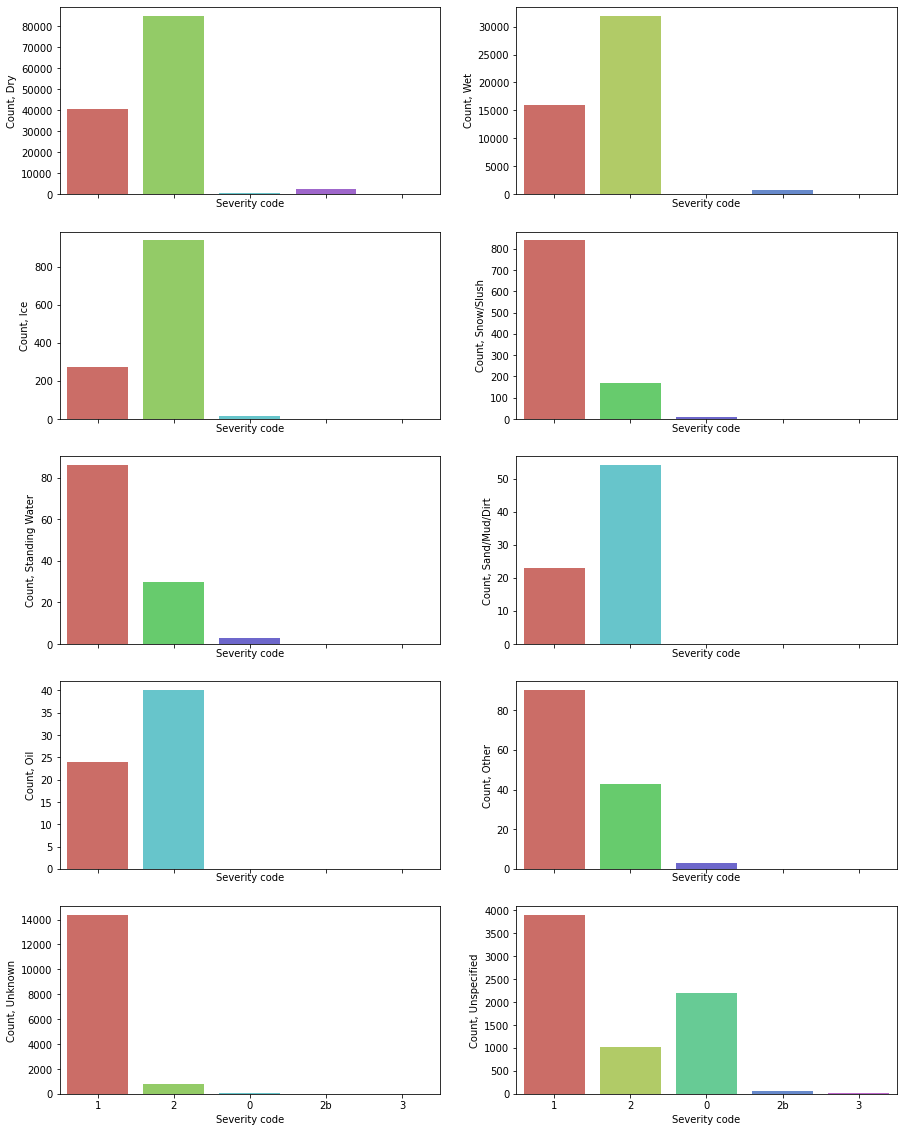

In [79]:
road1_df = df_coll_clean[df_coll_clean['ROADCOND']== 'Dry']
road2_df = df_coll_clean[df_coll_clean['ROADCOND']== 'Wet']
road3_df = df_coll_clean[df_coll_clean['ROADCOND']== 'Ice']
road4_df = df_coll_clean[df_coll_clean['ROADCOND']== 'Snow/Slush']
road5_df = df_coll_clean[df_coll_clean['ROADCOND']== 'Standing Water']
road6_df = df_coll_clean[df_coll_clean['ROADCOND']== 'Sand/Mud/Dirt']
road7_df = df_coll_clean[df_coll_clean['ROADCOND']== 'Oil']
road8_df = df_coll_clean[df_coll_clean['ROADCOND']== 'Other']
road9_df = df_coll_clean[df_coll_clean['ROADCOND']== 'Unknown']
road10_df = df_coll_clean[df_coll_clean['ROADCOND']== 'Unspecified']


fig, axes = plt.subplots(5, 2, sharex = True, figsize = (15,20))

sns.countplot(ax = axes[0, 0], x = road1_df['SEVERITYCODE'], palette = 'hls', data = road1_df)
axes[0,0].set(xlabel = 'Severity code', ylabel = 'Count, Dry')

sns.countplot(ax = axes[0, 1], x = road2_df['SEVERITYCODE'], palette = 'hls', data = road2_df)
axes[0,1].set(xlabel = 'Severity code', ylabel = 'Count, Wet')

sns.countplot(ax = axes[1, 0], x = road3_df['SEVERITYCODE'], palette = 'hls', data = road3_df)
axes[1,0].set(xlabel = 'Severity code', ylabel = 'Count, Ice')

sns.countplot(ax = axes[1, 1], x = road4_df['SEVERITYCODE'], palette = 'hls', data = road4_df)
axes[1,1].set(xlabel = 'Severity code', ylabel = 'Count, Snow/Slush')

sns.countplot(ax = axes[2, 0], x = road5_df['SEVERITYCODE'], palette = 'hls', data = road5_df)
axes[2,0].set(xlabel = 'Severity code', ylabel = 'Count, Standing Water')

sns.countplot(ax = axes[2, 1], x = road6_df['SEVERITYCODE'], palette = 'hls', data = road6_df)
axes[2,1].set(xlabel = 'Severity code', ylabel = 'Count, Sand/Mud/Dirt')

sns.countplot(ax = axes[3, 0], x = road7_df['SEVERITYCODE'], palette = 'hls', data = road7_df)
axes[3,0].set(xlabel = 'Severity code', ylabel = 'Count, Oil')

sns.countplot(ax = axes[3, 1], x = road8_df['SEVERITYCODE'], palette = 'hls', data = road8_df)
axes[3,1].set(xlabel = 'Severity code', ylabel = 'Count, Other')

sns.countplot(ax = axes[4, 0], x = road9_df['SEVERITYCODE'], palette = 'hls', data = road9_df)
axes[4,0].set(xlabel = 'Severity code', ylabel = 'Count, Unknown')

sns.countplot(ax = axes[4, 1], x = road10_df['SEVERITYCODE'], palette = 'hls', data = road10_df)
axes[4,1].set(xlabel = 'Severity code', ylabel = 'Count, Unspecified')

**Relationship between Severity of an Accident and Lighting condition**

In [80]:
df_coll_clean['LIGHTCOND'].value_counts().to_frame('count')

,count
Daylight,119160
Dark - Street Lights On,50049
Unknown,13523
Unspecified,7328
Dusk,6076
Dawn,2598
Dark - No Street Lights,1572
Dark - Street Lights Off,1236
Other,244


[Text(0.5, 0, 'Severity code'), Text(0, 0.5, 'Count, Unspecified')]

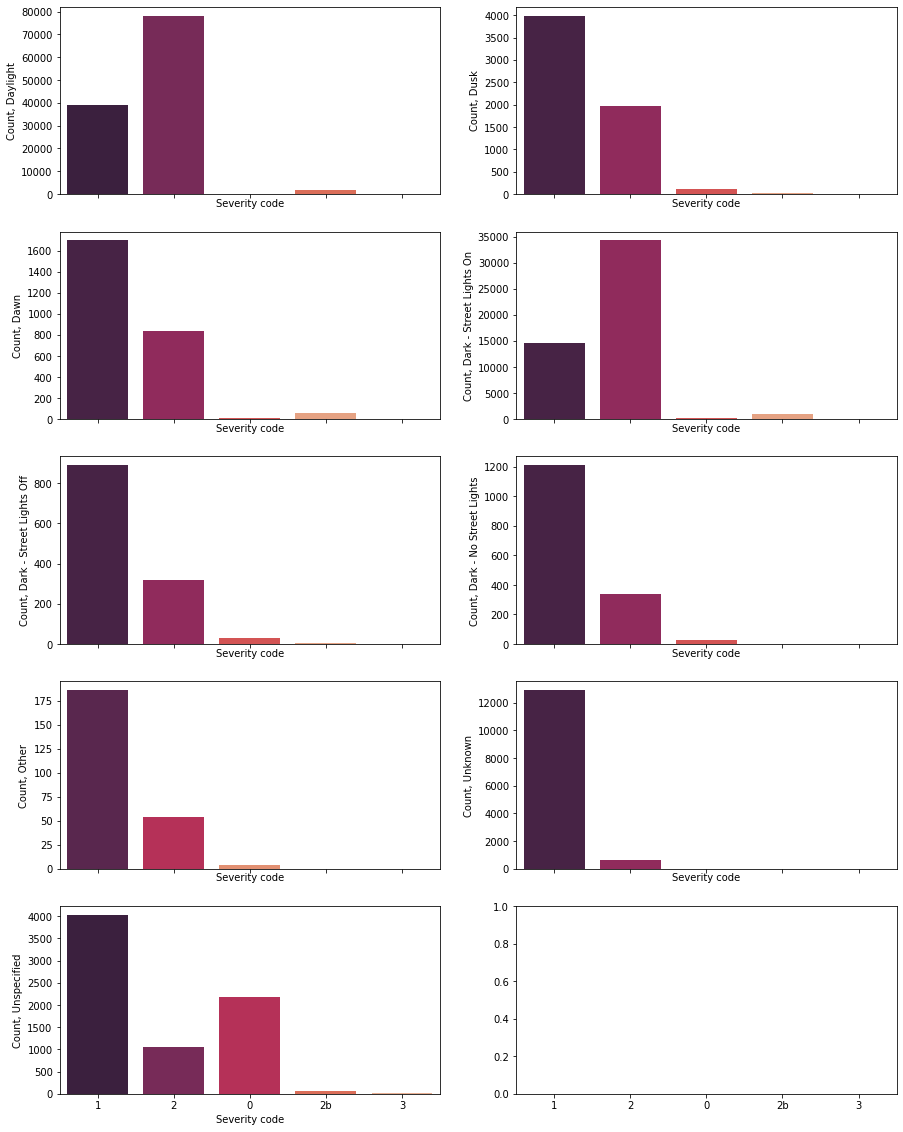

In [81]:
light1_df = df_coll_clean[df_coll_clean['LIGHTCOND']== 'Daylight']
light2_df = df_coll_clean[df_coll_clean['LIGHTCOND']== 'Dusk']
light3_df = df_coll_clean[df_coll_clean['LIGHTCOND']== 'Dawn']
light4_df = df_coll_clean[df_coll_clean['LIGHTCOND']== 'Dark - Street Lights On']
light5_df = df_coll_clean[df_coll_clean['LIGHTCOND']== 'Dark - Street Lights Off']
light6_df = df_coll_clean[df_coll_clean['LIGHTCOND']== 'Dark - No Street Lights']
light7_df = df_coll_clean[df_coll_clean['LIGHTCOND']== 'Other']
light8_df = df_coll_clean[df_coll_clean['LIGHTCOND']== 'Unknown']
light9_df = df_coll_clean[df_coll_clean['LIGHTCOND']== 'Unspecified']


fig, axes = plt.subplots(5, 2, sharex = True, figsize = (15,20))

sns.countplot(ax = axes[0, 0], x = light1_df['SEVERITYCODE'], palette = 'rocket', data = light1_df)
axes[0,0].set(xlabel = 'Severity code', ylabel = 'Count, Daylight')

sns.countplot(ax = axes[0, 1], x = light2_df['SEVERITYCODE'], palette = 'rocket', data = light2_df)
axes[0,1].set(xlabel = 'Severity code', ylabel = 'Count, Dusk')

sns.countplot(ax = axes[1, 0], x = light3_df['SEVERITYCODE'], palette = 'rocket', data = light3_df)
axes[1,0].set(xlabel = 'Severity code', ylabel = 'Count, Dawn')

sns.countplot(ax = axes[1, 1], x = light4_df['SEVERITYCODE'], palette = 'rocket', data = light4_df)
axes[1,1].set(xlabel = 'Severity code', ylabel = 'Count, Dark - Street Lights On')

sns.countplot(ax = axes[2, 0], x = light5_df['SEVERITYCODE'], palette = 'rocket', data = light5_df)
axes[2,0].set(xlabel = 'Severity code', ylabel = 'Count, Dark - Street Lights Off')

sns.countplot(ax = axes[2, 1], x = light6_df['SEVERITYCODE'], palette = 'rocket', data = light6_df)
axes[2,1].set(xlabel = 'Severity code', ylabel = 'Count, Dark - No Street Lights')

sns.countplot(ax = axes[3, 0], x = light7_df['SEVERITYCODE'], palette = 'rocket', data = light7_df)
axes[3,0].set(xlabel = 'Severity code', ylabel = 'Count, Other')

sns.countplot(ax = axes[3, 1], x = light8_df['SEVERITYCODE'], palette = 'rocket', data = light8_df)
axes[3,1].set(xlabel = 'Severity code', ylabel = 'Count, Unknown')

sns.countplot(ax = axes[4, 0], x = light9_df['SEVERITYCODE'], palette = 'rocket', data = light9_df)
axes[4,0].set(xlabel = 'Severity code', ylabel = 'Count, Unspecified')

**So the features data frame after the Exploratory Data Analysis phase looks like:**

In [82]:
print("Number of rows and columns in the features set respectively are:", features.shape)
features.head()

Number of rows and columns in the features set respectively are: (201786, 11)


,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,Intersection,2,1,0,1,At Intersection (intersection related),0,N,Clear,Dry,Daylight
1,Intersection,4,0,0,2,At Intersection (intersection related),0,N,Raining,Wet,Dark - Street Lights On
2,Block,4,0,0,3,Mid-Block (not related to intersection),0,N,Clear,Dry,Daylight
3,Intersection,2,0,0,2,At Intersection (intersection related),0,N,Raining,Wet,Dark - Street Lights On
6,Block,2,0,0,2,Mid-Block (not related to intersection),0,N,Clear,Dry,Dark - Street Lights On


# Data pre-processing and Modeling

## Data pre-processing: Feature Extraction

In [83]:
from sklearn import preprocessing

**We are going to use One Hot Encoding technique to convert actegorical variable to binary variable and append them to the features data frame**

Let's define **our final features set as `X`** and let's first add to it all the numeric variables in the `features` dataframe

In [84]:
X = features[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INATTENTIONIND']]
X.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND
0,2,1,0,1,0
1,4,0,0,2,0
2,4,0,0,3,0
3,2,0,0,2,0
6,2,0,0,2,0


Now let's make use of **One Hot Encoding** technique and append to `X` all the categorical variables from `features` after converting them into binary variables 

In [86]:
X = pd.concat([X, pd.get_dummies(features['ADDRTYPE'])], axis=1)
X = pd.concat([X, pd.get_dummies(features['JUNCTIONTYPE'])], axis=1)
X = pd.concat([X, pd.get_dummies(features['UNDERINFL'])], axis=1)
X = pd.concat([X, pd.get_dummies(features['WEATHER'])], axis=1)
X = pd.concat([X, pd.get_dummies(features['ROADCOND'])], axis=1)
X = pd.concat([X, pd.get_dummies(features['LIGHTCOND'])], axis=1)

print(X.shape)
X.head()

(201786, 50)


,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,Alley,Block,Intersection,Other,At Intersection (but not related to intersection),...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk,Other,Unknown,Unspecified
0,2,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,4,0,0,2,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,4,0,0,3,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,0,0,2,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
6,2,0,0,2,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Now let's define **our target variavle as `y`**

In [87]:
y = df_coll_clean['SEVERITYCODE'].values ## the 'df_coll_clean' dataframe is consistent with the 'features' dataframe
                                            
y[0:5]

array(['2', '2', '1', '1', '1'], dtype=object)

## Modeling

We are going to develope a **preditive model** which would be capable of predicting the Severity of the future accidents.

This problem is of the type **"Muti-class Classification"** as there are more than two labels in our taget variable `SEVERITYCODE` to predict from.

So **we are goin to develope Classification Models** with various classification algorithms and compare their performances in the "Model Evaluation" phase in an intent to select the model with the best accuracy scores.

# Model Evaluation